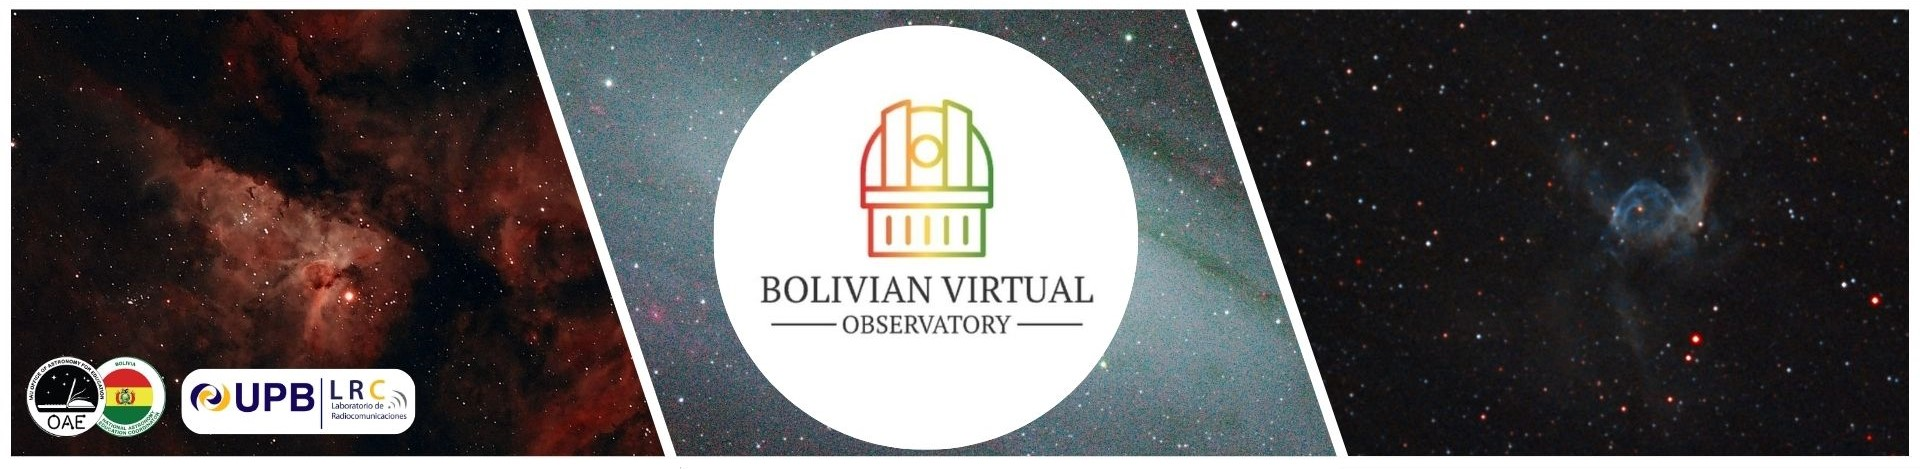

---

**[ES]**  
Presentamos un repositorio Jupyter Notebook para los programas de capacitación en el estudio de fenómenos astronómicos transitorios para el proyecto Bolivian Virtual Observatory (BVO).

Se utiliza el paquete AstroPy en entornos de Python 3.0, junto con el software "Photutils: Photometry Tools."  
(Bradley, Larry, et al. Astropy Project. Última mo agosto de 2024. [https://photutils.readthedocs.io/en/stable/](https://photutils.readthedocs.io/en/stable/).)

Desarrollado por G. Jaimes (gabrieljaimes@upb.edu) utilizando metadatos propios del proyecto Bolivian Virtual Observatory (BVO), adquiridos con la red de telescopios remotos del Observatorio de Las Cumbres (LCO).  
Está prohibido el uso de este repositorio con fines lucrativos o de formación universitaria sin el consentimiento del proyecto BVO.

---

**[EN]**  
We present a Jupyter Notebook repository for training programs in the study of transient astronomical phenomena for the Bolivian Virtual Observatory (BVO) project.

The AstroPy package is used in Python 3.0 environments, along with the "Photutils: Photometry Tools" software.  
(Bradley, Larry, et al. Astropy Project. Last modified 2024. [https://photutils.readthedocs.io/en/stable/](https://photutils.readthedocs.io/en/stable/).)

Developed by G. Jaimes (gabrieljaimes@upb.edu) using proprietary metadata from the Bolivian Virtual Observatory (BVO) projected byquirsing the Las Cumbres Observatory (LCO) remote telescope network.  
The use of this repository for commercial purposes or university trairohibited withoutnohibhout the BVO project's c del proyecto BVO.

---

El flujo del pipelmuestra a cne de este N
ontinuación:
:
proyectO.

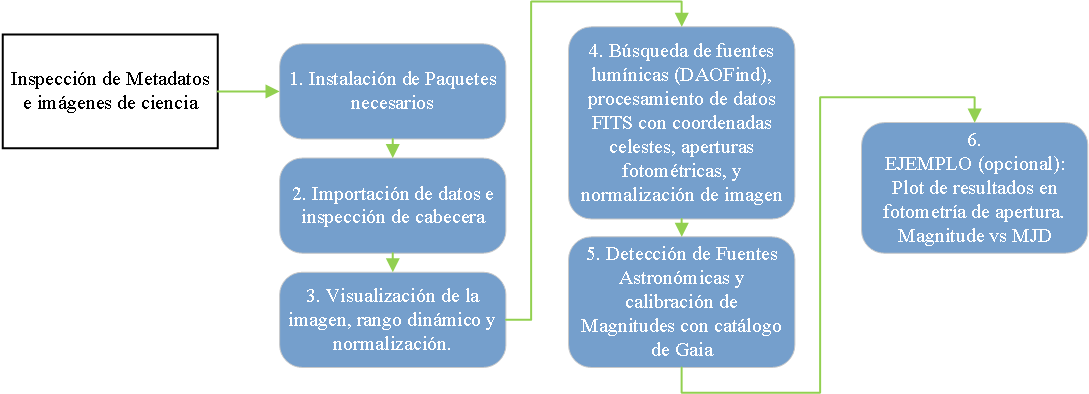

**1. Instalación de librerias requeridas.**

Un repositorio de Jupyter Notebook en funcionamiento requiere bibliotecas de datos relacionados, bases de datos dedicadas y funciones del procesamiento de Python 3.0 que se instalan en el entorno. El siguiente comando de instalación, se refiere a la actualización e instalación de varios paquetes principales para el análisis astronómico. `photutils` para análisis de imagen, `pytest-astropy` para pruebas, `astropy` para datos astronómicos, `matplotlib` para gráficos, `acstools` con datos de astronave Hubble y `astroquery` para consulta de la base de datos astronómica.

In [ ]:
!pip install photutils pandas scipy pytest-astropy astropy matplotlib acstools astroquery --upgrade

**2. Importación de datos e inspección de cabecera**
   
En astrofísica es muy común la utilización de archivos .fits provenientes de la adquisición de datos del telescopio e instrumento. La imagen, contiene información de importancia en el header del archivo. Esta parte se encarga de leer y procesar un archivo FITS (Flexible Image Transport System). Primero, se importan las librerías necesarias para manipular los archivos FITS, los datos tabulares y presentar los resultados en forma de tabla HTML en un ambiente Jupyter Notebook. Luego, crea una lista para almacenar las claves y los valores del encabezado y establece la ruta del archivo FITS. Para facilitar su análisis, abre el archivo, extrae el encabezado de la primera extensión, guarda las claves y los valores en una lista y muestra este DataFrame en formato tabular.

In [ ]:
# ACCIÓN: PARAMETRIZACIÓN

#---------2.- Definición de Ruta y Inicialización de Variables---------
# Ruta al archivo FITS
file_path = 'C:/Users/Usuario/Downloads/2024sbx/E2/lsc0m476-sq34-20240904-0086-e91.fits'

In [ ]:
#---------1.- Importación de Librerías---------
from astropy.io import fits
import pandas as pd
from astropy.coordinates import Angle
from astropy import units as u
from IPython.display import display, HTML
import numpy as np

# Lista para almacenar las claves y valores del encabezado
header_list = []

#---------2.- Procesamiento del Archivo FITS---------
# Abrir el archivo FITS
with fits.open(file_path) as hdul:
    # Obtener el encabezado de la primera extensión
    header = hdul[0].header
    data = hdul[0].data
    
    # Extraer los valores específicos
    origname = header.get('ORIGNAME', 'No disponible')
    project = header.get('GROUPID', 'No disponible')
    mjd_obs = header.get('MJD-OBS', 'No disponible')
    exptime = header.get('EXPTIME', 'No disponible')
    filter1 = header.get('FILTER1', 'No disponible')
    location = header.get('SITE', 'No disponible')
    
    # Extraer y convertir RA y DEC a formato decimal
    ra = header.get('RA', 'No disponible')
    dec = header.get('DEC', 'No disponible')

    if ra != 'No disponible' and dec != 'No disponible':
        ra_angle = Angle(ra, unit=u.hourangle)  # RA usualmente viene en horas
        dec_angle = Angle(dec, unit=u.deg)      # DEC usualmente viene en grados

        ra_decimal = ra_angle.deg  # Convertir RA a grados decimales
        dec_decimal = dec_angle.deg  # DEC ya está en grados decimales
    else:
        ra_decimal = 'No disponible'
        dec_decimal = 'No disponible'

    # Añadir RA y DEC a los datos importantes
    important_data = {
        'Clave': ['ORIGNAME', 'GROUPID', 'MJD-OBS', 'EXPTIME', 'FILTER1', 'LOCATION', 'RA (deg)', 'DEC (deg)'],
        'Valor': [origname, project, mjd_obs, exptime, filter1, location, ra_decimal, dec_decimal]
    }
    important_df = pd.DataFrame(important_data)

    # Mostrar la tabla con los valores específicos
    display(HTML("<h3>DATOS DE IMPORTANCIA EN LA CABECERA:</h3>"))
    display(HTML(important_df.to_html(index=False)))

    # Guardar las claves y valores del encabezado en la lista
    for key in list(header.keys())[:40]:  # Puedes limitar si quieres a las primeras 40 claves
        header_list.append((key, header[key]))

# Crear un DataFrame con la lista de claves y valores
header_df = pd.DataFrame(header_list, columns=['Clave', 'Valor'])

# Mostrar el DataFrame de manera más visual estilo tabla de Excel
display(HTML("<h3>CABECERA COMPLETA:</h3>"))
display(HTML(header_df.to_html(index=False)))


In [ ]:
# ACCIÓN: PARAMETRIZACIÓN 
#  La Coordenadas de RA y DEC se las deben asignar específicamente para nuestro objeto celestes de estudio. /Las anteriores son de la Imagen)
ob_ra = 302.724469875    # Coordenada (decimal): Ascensión Recta
ob_de = -27.4591675625   #Coordenada (decimal): Declinación 
exptime = 120      # Tiempo de exposición en segundos

**3. Visualización de la imagen, rango dinámico y normalización.**

Esta sección se ocupa de mostrar los datos de un archivo FITS. Las librerías necesarias para la visualización (`matplotlib`), la normalización de imágenes (`astropy.visualization`) y la lectura de archivos FITS (`astropy.io.fits`). En primer lugar se importan los paquetes necesarios. Luego, se extrae los datos de la imagen y establece la ruta al archivo FITS, que se indica en el código. Para mejorar la visualización, se establecen los parámetros de normalización de la imagen mediante un estiramiento de tipo raíz cuadrada. Por último, se crea y exhibe una imagen con la normalización empleada, con una escala de colores particular y una barra de color para determinar la intensidad.

In [ ]:
# ACCIÓN: PARAMETRIZACIÓN
vmin = 10  # o algún valor pequeño que represente el ruido de fondo
vmax = np.percentile(data, 99)  # ajusta según sea necesario


In [ ]:
#---------1.- Importación de Librerías---------
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch, ImageNormalize
from astropy.io import fits
import numpy as np

#---------3.- Visualización de Datos---------
# Crear la normalización con límites manuales y estiramiento sqrt
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

# Visualizar los datos con el estiramiento aplicado
plt.figure(figsize=(30, 15))
plt.imshow(data, cmap='RdYlBu', norm=norm, origin='lower')
plt.colorbar()
plt.show()


**4. Búsqueda de fuentes lumínicas (DAOFind), procesamiento de datos FITS con coordenadas celestes, aperturas fotométricas, y normalización de imagen**

Este proceso se centra en identificar y analizar fuentes lumínicas en una imagen astronómica y en la visualización de estas fuentes utilizando técnicas avanzadas de fotometría y normalización de imágenes.

Primero, se importan las librerías necesarias, como `numpy` y `IPython.display` para el manejo de datos numéricos y visualización en Jupyter Notebook, `astropy.stats` para el análisis estadístico, `photutils.datasets` para la carga de conjuntos de datos de imágenes, y `photutils.detection` para la detección de estrellas. También se utilizan `matplotlib` para la visualización de imágenes, `astropy.visualization` para la normalización, y `photutils.aperture` para la fotometría de aperturas. Además, se emplean `astropy.coordinates`, `astropy.wcs`, y `astropy.io.fits` para la manipulación de coordenadas celestes y la lectura de archivos FITS. Luego, se cargan los datos de un archivo FITS y se extraen tanto los datos de imagen como la cabecera, creando un objeto WCS que permite la conversión de coordenadas celestes a píxeles en la imagen. A partir de estos datos, se calculan las estadísticas de fondo, como la media, mediana y desviación estándar.

El siguiente paso es aplicar el algoritmo DAOStarFinder para identificar las fuentes estelares en la imagen. Se calcula la relación señal-ruido (SNR) de las fuentes identificadas, así como el error en la magnitud asociado a cada fuente. Esta información se organiza en una tabla, la cual se formatea y visualiza en HTML. Finalmente, se procede a la visualización de la imagen con las fuentes identificadas. Se definen aperturas circulares y anillos para la fotometría alrededor de las fuentes y en una nueva posición basada en coordenadas celestes. Se normaliza la imagen para mejorar su visualización, y se superponen las aperturas y los anillos sobre la imagen. El resultado final se muestra como una imagen visualmente enriquecida con las aperturas y anillos destacados.

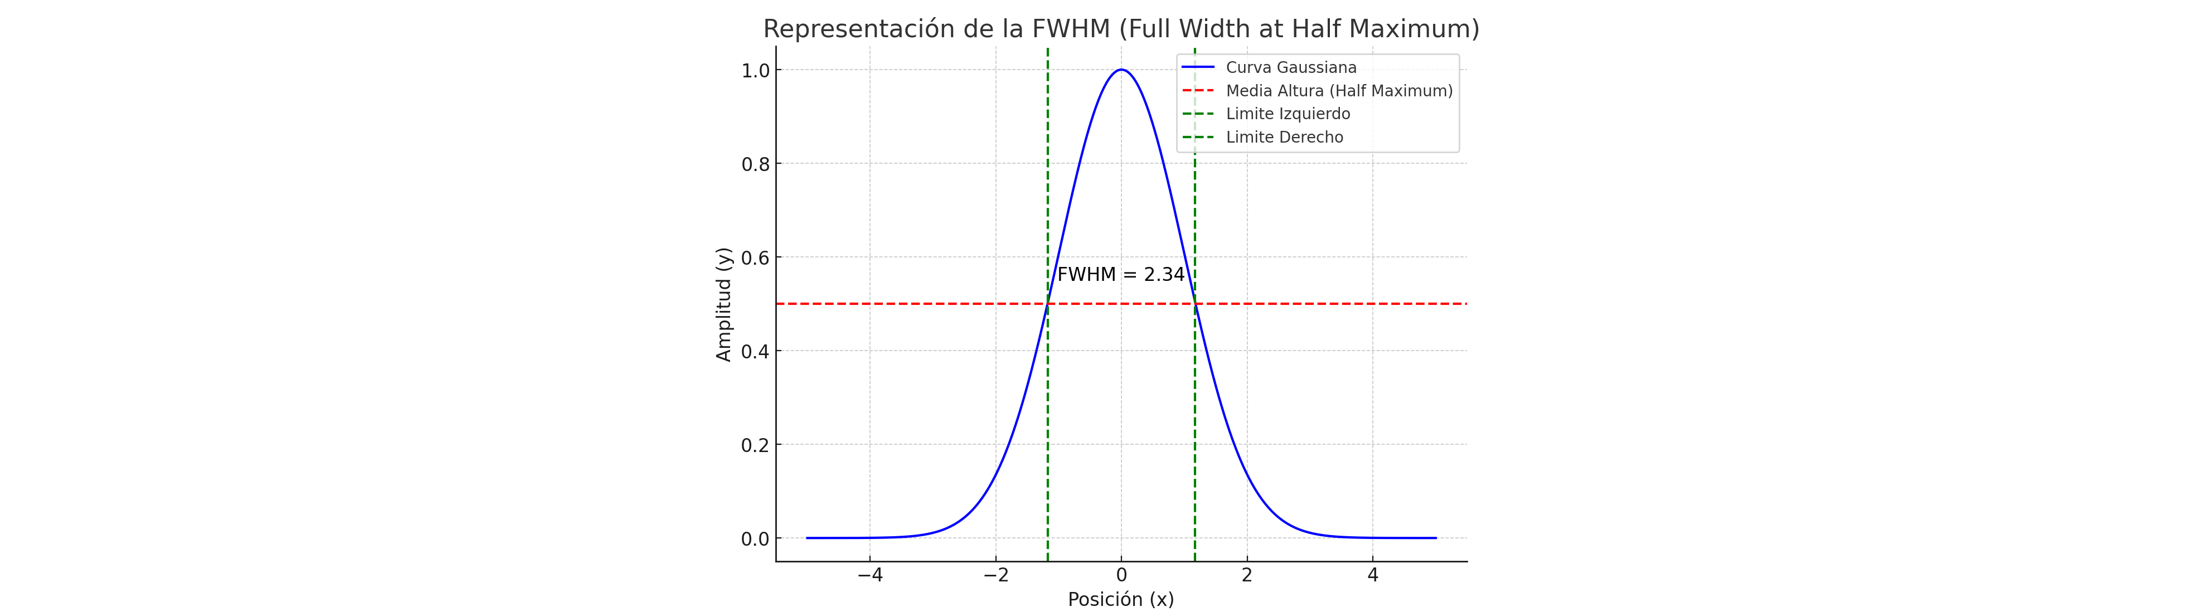

In [ ]:
# ACCIÓN: PARAMETRIZACIÓN

sigma = 3  # Desviación estándar (sigma) utilizada en la estadística de fondo. Valor adimensional.
           # Se usa para calcular las estadísticas del fondo de la imagen (como la media y el ruido).
           
threshold = 4.0  # Umbral (threshold) en unidades de sigma, utilizado para la detección de fuentes.
                 # Define cuántas desviaciones estándar por encima del fondo debe estar una fuente
                 # para ser detectada.

fwhm = 3.0  # Full Width at Half Maximum (FWHM) en píxeles, se refiere al tamaño característico
            # de las fuentes en la imagen. Representa el ancho de la fuente a la mitad de su valor
            # máximo de brillo. Indica el grado de "


In [ ]:
#---------1.- Importar Librerías---------
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats, aperture_photometry
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder
from IPython.display import display, HTML

#---------2.- Cargar Datos FITS y Cabecera---------
# Leer el archivo FITS y extraer los datos
with fits.open(file_path) as hdul:
    data = hdul[0].data
    
# Crear el objeto WCS a partir de la cabecera
wcs = WCS(hdul[0].header)

#---------3.- Definir Coordenadas del Objeto y Convertir a Píxeles---------
ra_dec_positions = SkyCoord(ob_ra, ob_de, unit='deg', frame='icrs')
pixel_positions = np.array(ra_dec_positions.to_pixel(wcs)).T
print(f"Posición del objeto celeste: xpix = {pixel_positions[0]:.20f} [pix], ypix = {pixel_positions[1]:.20f}")  

#---------4.- Estadísticas de Fondo---------
mean, median, std = sigma_clipped_stats(data, sigma=sigma)  
print(f"Media: {mean:.20f}, Mediana: {median:.20f}, Desviación Estándar: {std:.20f}")  

#---------5.- Detección de Fuentes---------
daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold*std)  
sources = daofind(data - median)  

# Estimar la SNR como el flujo dividido por la raíz cuadrada del flujo (estimación simple de error de Poisson)
snr = sources['flux'] / np.sqrt(sources['flux'])

# Limitar los valores de SNR para evitar números muy altos
snr = np.where(snr > 0, snr, 1)  # Evitar valores nulos o negativos

# Calcular el error de magnitud basado en la SNR
mag_error = 2.5 / np.log(10) * (1 / snr)

# Agregar la columna 'mag_err' (error de magnitud) a la tabla
sources['mag_err'] = mag_error

# Formatear las columnas para la impresión
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # Consistencia en la salida de la tabla

#---------6.- Cargar Posiciones de las Fuentes, Crear Aperturas Circulares y Anillos---------
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=fwhm)  # Usar FWHM para aperturas

# Crear aperturas circulares adicionales en la posición en píxeles del objeto
additional_apertures = CircularAperture(pixel_positions, r=fwhm * 1.5)  # Radio mayor para aperturas adicionales

# Definir el anillo con radios interno y externo
annulus_aperture = CircularAnnulus(positions, r_in=fwhm, r_out=fwhm * 1.5)

#---------7.1.- Calcular Distancia de las Fuentes a la Posición de Interés---------
# Calcular distancias de cada fuente detectada a las coordenadas del objeto de interés
distances = np.sqrt((sources['xcentroid'] - pixel_positions[0])**2 + (sources['ycentroid'] - pixel_positions[1])**2)

# Encontrar la fuente más cercana
closest_idx = np.argmin(distances)
closest_source = sources[closest_idx]

# Extraer los valores de interés
closest_flux = closest_source['flux']
closest_mag_err = closest_source['mag_err']

# Calcular la magnitud de la fuente más cercana
closest_magnitude = -2.5 * np.log10(closest_flux)

#---------7.- Visualizar Datos con Estiramiento Aplicado---------
# Definir normalización y estiramiento para la visualización
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

plt.figure(figsize=(30, 15))
plt.imshow(data, cmap='RdYlBu', norm=norm, origin='lower')
plt.colorbar()

# Graficar aperturas originales
apertures.plot(color='red', lw=1.5, alpha=0.5)

# Graficar anillos
annulus_aperture.plot(color='blue', lw=3.5, alpha=0.2)

# Graficar la apertura de nuestro objeto celeste (Supernova)
additional_apertures.plot(color='black', lw=9.5, alpha=0.5)

plt.show()

#---------7.2.- Mostrar la Información de la Fuente Más Cercana---------
print(f"<b>Fuente más cercana:</b><br>Posición (x, y): ({closest_source['xcentroid']:.2f}, {closest_source['ycentroid']:.2f})<br>Magnitud: {closest_magnitude:.2f}<br>Error de magnitud: {closest_mag_err:.2f}")

#---------8.- Mostrar la Tabla como HTML---------
html_table = sources._repr_html_()

# Mostrar la tabla como HTML en un entorno compatible
display(HTML(html_table))


**5. Detección de Fuentes Astronómicas y calibración de Magnitudes con catálogo de Gaia**

Este proceso implica la detección y análisis de fuentes astronómicas utilizando imágenes FITS y datos del catálogo de Gaia. Se inicia con la importación de librerías esenciales como `numpy`, `matplotlib`, y herramientas específicas de `astropy` y `photutils`, que permiten la manipulación de datos FITS y el análisis de coordenadas astronómicas. Luego, se cargan los datos FITS de una imagen astronómica y se extraen tanto los datos como la cabecera para construir un objeto WCS, que facilita la conversión de coordenadas celestes en píxeles. Se calculan estadísticas básicas del fondo de la imagen, como la media, mediana y desviación estándar, fundamentales para la detección precisa de objetos. Posteriormente, se identifican las fuentes celestes en la imagen y se calculan parámetros como la relación señal-ruido (SNR) y el error en la magnitud, los cuales se almacenan en una tabla. Se realiza una consulta en el catálogo de Gaia utilizando una consulta ADQL para localizar estrellas dentro de un radio específico alrededor de las coordenadas del objeto de interés. El código luego compara las fuentes detectadas con las estrellas de Gaia, evaluando la precisión de las coincidencias mediante un umbral de tolerancia y el error en la magnitud. Finalmente, se calcula el Zero Point (ZP) para las coincidencias filtradas, se genera una tabla HTML con los resultados depurados y se visualiza la imagen con aperturas y coincidencias graficadas, proporcionando una representación integral de las fuentes detectadas y su comparación con el catálogo de Ga.

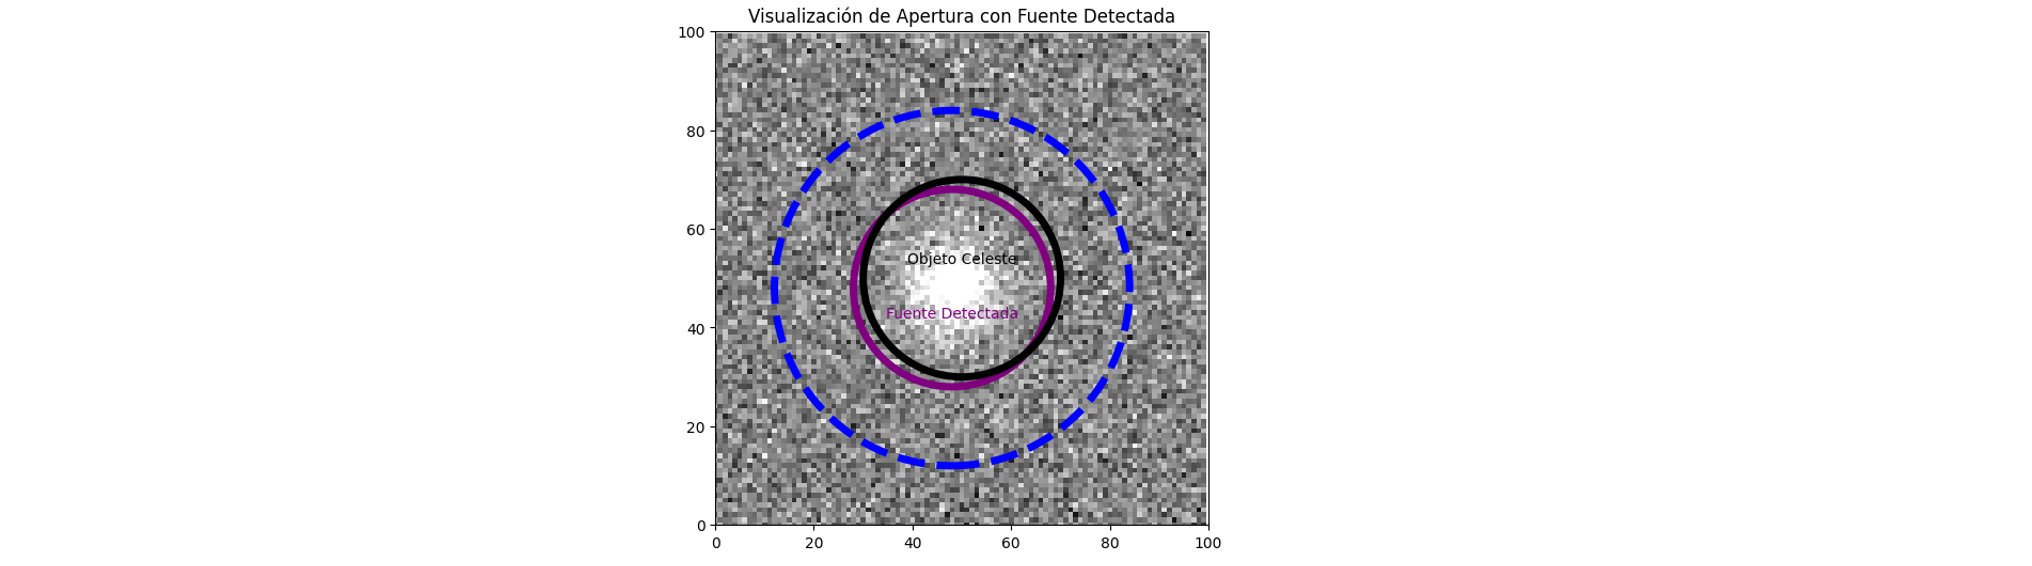.


In [ ]:
# ACCIÓN: PARAMETRIZACIÓN

tolerance_radius = 3  # Tolerancia en píxeles para coincidencias entre las fuentes detectadas
                      # y las posiciones de las estrellas de Gaia. Define la distancia máxima
                      # en píxeles para considerar que una fuente detectada y una estrella de Gaia
                      # son la misma.

radius = 0.25  # Radio en grados para la búsqueda de estrellas en el catálogo de Gaia.
              # Define el tamaño del área alrededor de las coordenadas del objeto celeste
              # en el cual se buscarán coincidencias con estrellas de Gaia.

In [ ]:
#---------1.- Importar Librerías---------
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture, CircularAnnulus
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astroquery.gaia import Gaia
from astropy.table import Table
from IPython.display import display, HTML
import astropy.units as u

#---------2.- Cargar Datos FITS y Cabecera---------
# Leer el archivo FITS y extraer los datos
with fits.open(file_path) as hdul:
    data = hdul[0].data
    
# Crear el objeto WCS a partir de la cabecera de la imagen
wcs = WCS(hdul[0].header)

# Verifica que las coordenadas estén alineadas correctamente con Gaia
ra_dec_positions = SkyCoord(ob_ra, ob_de, unit='deg', frame='icrs')

#---------3.- Definir Coordenadas del Objeto y Convertir a Píxeles---------
pixel_positions = np.array(ra_dec_positions.to_pixel(wcs)).T
# Información del objeto celeste
celestial_x = pixel_positions[0]
celestial_y = pixel_positions[1]

#---------4.- Estadísticas de Fondo---------
mean, median, std = sigma_clipped_stats(data, sigma=sigma)  

#---------5.- Detección de Fuentes---------
daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold*std)  
sources = daofind(data - median)  

# Imprimir la cantidad de fuentes detectadas

# Estimar la SNR como el flujo dividido por la raíz cuadrada del flujo (estimación simple de error de Poisson)
snr = sources['flux'] / np.sqrt(sources['flux'])

# Limitar los valores de SNR para evitar números muy altos
snr = np.where(snr > 0, snr, 1)  # Evitar valores nulos o negativos

# Calcular el error de magnitud basado en la SNR
mag_error = 2.5 / np.log(10) * (1 / snr)

# Agregar la columna 'mag_err' (error de magnitud) a la tabla
sources['mag_err'] = mag_error

#---------6.- Calcular Distancia de las Fuentes a la Posición de Interés---------
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
distances = np.sqrt((sources['xcentroid'] - celestial_x)**2 + (sources['ycentroid'] - celestial_y)**2)

# Encontrar la fuente más cercana
closest_idx = np.argmin(distances)
closest_source = sources[closest_idx]
closest_flux = closest_source['flux']
closest_mag_err = closest_source['mag_err']
closest_magnitude = -2.5 * np.log10(closest_flux)
distance_to_closest = distances[closest_idx]

# ---------7.- Consultar Catálogo de Gaia con ADQL---------
adql_query = f"""
SELECT * 
FROM gaiadr3.gaia_source 
WHERE CONTAINS(
    POINT('ICRS', ra, dec), 
    CIRCLE('ICRS', {ra_dec_positions.ra.deg}, {ra_dec_positions.dec.deg}, {radius})
)=1
"""

# Ejecutar la consulta con ADQL
job = Gaia.launch_job_async(adql_query)
gaia_result = job.get_results()

# Filtrar estrellas de Gaia con magnitudes disponibles en el filtro G (limitar a magnitud 30 si necesario)
gaia_stars = gaia_result[gaia_result['phot_g_mean_mag'] < 30]

# Convertir coordenadas de Gaia a píxeles
gaia_coords = SkyCoord(gaia_stars['ra'], gaia_stars['dec'], unit='deg', frame='icrs')
gaia_pixel_positions = np.array(gaia_coords.to_pixel(wcs)).T

# ---------8.- Coincidencias con Gaia---------
matches = []
gaia_matched_indices = set()  

for i, (x, y) in enumerate(positions):
    distances_gaia = np.sqrt((gaia_pixel_positions[:, 0] - x)**2 + (gaia_pixel_positions[:, 1] - y)**2)
    match_idx = np.argmin(distances_gaia)
    
    if distances_gaia[match_idx] < tolerance_radius and sources['mag_err'][i] <= 1:
        if match_idx not in gaia_matched_indices:
            matches.append((sources[i], gaia_stars[match_idx]))
            gaia_matched_indices.add(match_idx)

matches_filtered = [(source, gaia_star) for source, gaia_star in matches if source['mag_err'] < 1.0]

# ---------9.- Cálculo del Zero Point (ZP)---------
filtered_zp_values = []
for source, gaia_star in matches_filtered:
    flux = source['flux']
    gaia_mag = gaia_star['phot_g_mean_mag']
    zp = gaia_mag + 2.5 * np.log10(flux)
    filtered_zp_values.append(zp)

filtered_zp_mean = np.mean(filtered_zp_values)
filtered_zp_std = np.std(filtered_zp_values)

# Calcular la Magnitud Calibrada
calibrated_magnitude = closest_magnitude + filtered_zp_mean

# ---------10.- Crear Tablas HTML---------
# Información adicional para la tabla
info_rows = [
    ("Posición del objeto celeste (x, y)", f"({celestial_x:.20f}, {celestial_y:.20f})"),
    ("Media", f"{mean:.20f}"),
    ("Mediana", f"{median:.20f}"),
    ("Desviación Estándar", f"{std:.20f}"),
    ("Cantidad de fuentes detectadas", f"{len(sources)}"),
    ("Posición de la fuente más cercana (x, y)", f"({closest_source['xcentroid']:.2f}, {closest_source['ycentroid']:.2f})"),
    ("Magnitud Instrumental del Objeto Celeste", f"{closest_magnitude:.2f}"),
    ("Error de Magnitud", f"{closest_mag_err:.2f}"),
    ("Distancia a la Fuente más Cercana (píxeles)", f"{distance_to_closest:.2f}"),
    ("Número de estrellas Gaia encontradas", f"{len(gaia_result)}"),
    ("Cantidad total de coincidencias", f"{len(matches)}"),
    ("Cantidad de coincidencias con error de magnitud < 1.0", f"{len(matches_filtered)}"),
    ("Zero Point (ZP) promedio", f"{filtered_zp_mean:.2f}"),
    ("Desviación estándar de la Magnitud Calibrada", f"{filtered_zp_std:.2f}"),
    ("MAGNITUD CALIBRADA", f"{calibrated_magnitude:.2f}")
]

# Crear tabla para información general
info_table = Table(rows=info_rows, names=["Descripción", "Valor"])

# Mostrar tabla HTML
html_info_table = info_table._repr_html_()
display(HTML(html_info_table))

# Tabla para coincidencias depuradas
filtered_matched_sources = Table(rows=[(source['id'], source['xcentroid'], source['ycentroid'], gaia_star['ra'], gaia_star['dec'], gaia_star['phot_g_mean_mag'], zp, source['mag_err']) 
                                       for (source, gaia_star), zp in zip(matches_filtered, filtered_zp_values)],
                                names=('Source ID', 'X Centroid', 'Y Centroid', 'Gaia RA', 'Gaia DEC', 'Gaia G Mag', 'Zero Point', 'Source Error'))

# Mostrar tabla HTML para coincidencias filtradas
html_filtered_table = filtered_matched_sources._repr_html_()
display(HTML(html_filtered_table))


#---------11.- Crear Tablas HTML para los Resultados---------
# Crear tabla con coincidencias depuradas y sus valores de ZP
filtered_matched_sources = Table(rows=[(source['id'], source['xcentroid'], source['ycentroid'], gaia_star['ra'], gaia_star['dec'], gaia_star['phot_g_mean_mag'], zp, source['mag_err']) 
                                       for (source, gaia_star), zp in zip(matches_filtered, filtered_zp_values)],
                                names=('Source ID', 'X Centroid', 'Y Centroid', 'Gaia RA', 'Gaia DEC', 'Gaia G Mag', 'Zero Point', 'Source Error'))

# Mostrar la tabla depurada como HTML
html_filtered_table = filtered_matched_sources._repr_html_()
display(HTML(html_filtered_table))


#---------12.- Visualizar Datos con Estiramiento Aplicado y Coincidencias---------
# Definir normalización y estiramiento para la visualización
norm = ImageNormalize(vmin=np.percentile(data, 5), vmax=np.percentile(data, 95), stretch=SqrtStretch())

plt.figure(figsize=(30, 15))
plt.imshow(data, cmap='RdYlBu', norm=norm, origin='lower')
plt.colorbar()

# Graficar aperturas originales (fuentes detectadas)
apertures.plot(color='red', lw=1.5, alpha=0.5)

# Graficar anillos (aperturas circulares alrededor de las fuentes)
annulus_aperture.plot(color='blue', lw=3.5, alpha=0.2)

# Graficar la apertura de nuestro objeto celeste (Supernova)
additional_apertures.plot(color='black', lw=9.5, alpha=0.5)

# Graficar las estrellas encontradas en Gaia en color naranja
for gaia_x, gaia_y in gaia_pixel_positions:
    plt.gca().add_patch(plt.Circle((gaia_x, gaia_y), tolerance_radius / 2, color='orange', fill=False, lw=2, linestyle='-'))

# Graficar coincidencias con Gaia en color verde
for source, _ in matches:
    plt.gca().add_patch(plt.Circle((source['xcentroid'], source['ycentroid']), tolerance_radius, color='green', fill=False, lw=2, linestyle='--'))

# Graficar las coincidencias depuradas (con error < 1.0) en color azul
for source, _ in matches_filtered:
    plt.gca().add_patch(plt.Circle((source['xcentroid'], source['ycentroid']), tolerance_radius / 1.5, color='blue', fill=False, lw=2, linestyle='-'))

plt.show()


**6. EJEMPLO (opcional): Plot de resultados en fotometría de apertura. Magnitude vs MJD.**

Se importa librerías para graficar datos y manejar fechas, donde se definen varios conjuntos de datos de magnitudes y errores para diferentes observatorios y filtros, y usa colores específicos para cada filtro. La función `plot_data()` extrae y grafica estos datos, incluyendo barras de error, con personalización en colores y marcadores. Finalmente, se genera un gráfico comparativo con etiquetas y una leyenda, mostrando magnitudes frente a fechas y ajustando el eÇje y para inversión, proporcionando una visualización clara de los datos fotométricos.

In [2]:
# ACCIÓN: PARAMETRIZACIÓN
# Añade tus nuevos datos de Fotometría para ahcer una Curva de lux:   ('filtro', Magnitud Calibrada, Error de Magnitud, MJD)
new_data = [
    ('g', 16.3424, 0.052, 60206.3009),
    ('g', 17.7973, 0.076, 60206.3106),
    ('g', 16.3175, 0.048, 60206.3487),
    ('g', 18.507, 0.096, 60282.4850),
    ('g', 17.45, 0.059, 60211.0333), # último dato añadido
]

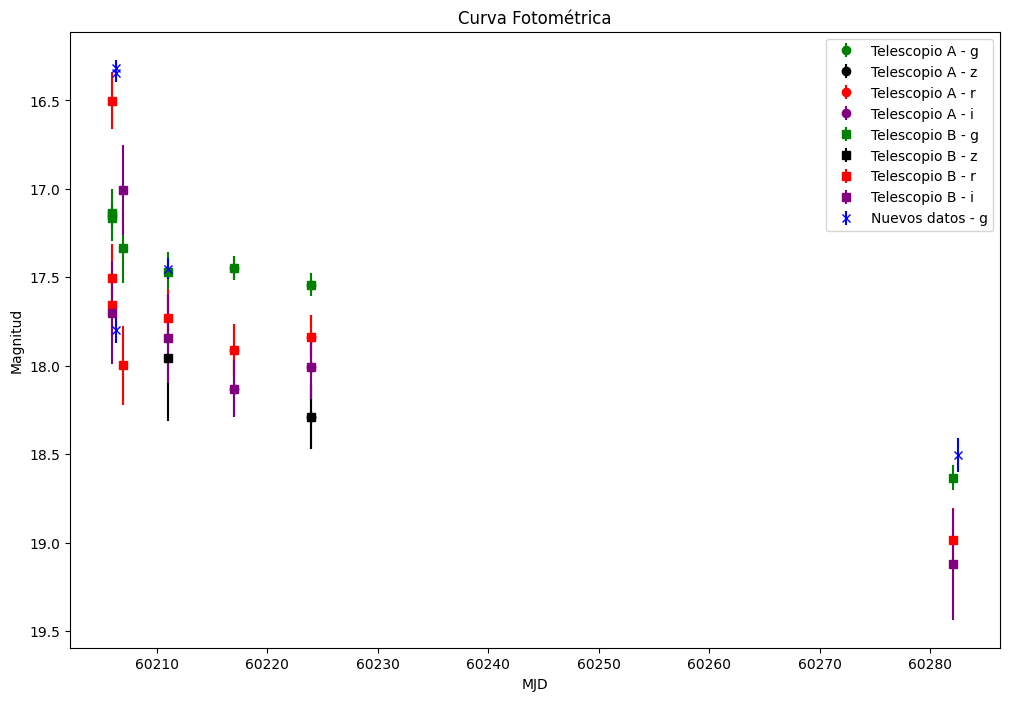

In [3]:
#---------1.- Importación de Librerías---------
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.time import Time

#---------2.- Datos de Observaciones - IAC80---------
# Telescopio A
data1 = [
    ('g', 17.4465, 0.066313, '30/09/23'),
    ('r', 17.9111, 0.145501, '30/09/23'),
    ('i', 18.1306, 0.160799, '30/09/23'),
    ('g', 17.5424, 0.065164, '07/10/23'),
    ('r', 17.8354, 0.120038, '07/10/23'),
    ('i', 18.0045, 0.18543, '07/10/23'),
    ('z', 18.2896, 0.179689, '07/10/23'),
]

#---------3.- Datos de Observaciones - LCO---------
# Telescopio B
data2 = [
    ('g', 17.1387, 0.065504, '19/09/23'),
    ('r', 16.50033, 0.163263, '19/09/23'),
    ('g', 17.1458, 0.147975, '19/09/23'),
    ('r', 17.5026, 0.193064, '19/09/23'),
    ('g', 17.1667, 0.0634, '19/09/23'),
    ('r', 17.6591, 0.177887, '19/09/23'),
    ('i', 17.6995, 0.291464, '19/09/23'),
    ('g', 17.3341, 0.199078, '20/09/23'),
    ('r', 17.9976, 0.225018, '20/09/23'),
    ('i', 17.0077, 0.253974, '20/09/23'),
    ('g', 17.4686, 0.110465, '24/09/23'),
    ('r', 17.7296, 0.165102, '24/09/23'),
    ('i', 17.8439, 0.25196, '24/09/23'),
    ('z', 17.9534, 0.36095, '24/09/23'),
    ('g', 18.633, 0.069477, '04/12/23'),
    ('r', 18.9848, 0.177824, '04/12/23'),
    ('i', 19.1234, 0.31248, '04/12/23'),
    ('g', 17.4465, 0.066313, '30/09/23'),
    ('r', 17.9111, 0.145501, '30/09/23'),
    ('i', 18.1306, 0.160799, '30/09/23'),
    ('g', 17.5424, 0.065164, '07/10/23'),
    ('r', 17.8354, 0.120038, '07/10/23'),
    ('i', 18.0045, 0.18543, '07/10/23'),
    ('z', 18.2896, 0.179689, '07/10/23'),
]

#---------4.- Definición de Colores para Filtros---------
# Define un diccionario para colores específicos de filtros
filter_colors = {
    'g': 'green',
    'r': 'red',
    'i': 'purple',
    'z': 'black',
}

#---------5.- Función para Graficar Datos---------
def plot_data(data, marker, base_color, label, specific_color=None):
    # Extraer filtros únicos
    filters = set(d[0] for d in data)
    for filt in filters:
        # Extraer datos para el filtro específico
        filt_data = [(d[1], d[2], d[3]) if len(d) > 3 else (d[1], d[2], None) for d in data if d[0] == filt]
        # Filtrar entradas con valores None para MJD
        filt_data = [d for d in filt_data if d[2] is not None]

        if filt_data and isinstance(filt_data[0][2], float):
            # Los datos están en formato MJD
            magnitudes = [d[0] for d in filt_data]
            errores = [d[1] for d in filt_data]
            fechas_mjd = [float(d[2]) for d in filt_data]
            fechas = fechas_mjd  # Usar MJD directamente para el eje x
        else:
            # Los datos tienen cuatro elementos, es el formato de fecha en cadena
            fechas = [Time(datetime.strptime(d[2], '%d/%m/%y')).mjd for d in filt_data]
            magnitudes = [d[0] for d in filt_data]
            errores = [d[1] for d in filt_data]

        # Usar el color específico si se proporciona, de lo contrario, el color específico del filtro o el color base
        color = specific_color if specific_color else filter_colors.get(filt, base_color)

        # Graficar datos con barras de error
        ax.errorbar(
            fechas,
            magnitudes,
            yerr=errores,
            fmt=marker,
            label=f'{label} - {filt}',
            color=color
        )

#---------6.- Creación de Gráfica---------
# Ejemplo de uso de gráfico con tamaño aumentado
fig, ax = plt.subplots(figsize=(12, 8))

#---------7.- Graficar Múltiples Conjuntos de Datos---------
# Graficar múltiples conjuntos de datos
plot_data(data1, 'o', 'blue', 'Telescopio A')
plot_data(data2, 's', 'green', 'Telescopio B')
plot_data(new_data, 'x', 'orange', 'Nuevos datos', specific_color='blue')  # Asegurarse de que los nuevos datos se grafiquen en azul

#---------8.- Personalización de la Gráfica---------
# Personalizar gráfica
ax.set_xlabel('MJD')
ax.set_ylabel('Magnitud')
ax.set_title('Curva Fotométrica')
# Invertir el eje y
plt.gca().invert_yaxis()
ax.legend()

#---------9.- Mostrar la Gráfica---------
plt.show()
